# 가설 설정
- 

# 한계점
- 보이스피싱 검색 시 게시글은 3.6만건 조회되었으나 크롤링 결과 약 500건만 수집됨
    - 비공개 게시글은 검색 결과수에는 함께 집계되나 게시글을 볼 수는 없기에 수집할 수 없음
- 수집된 500건의 데이터 역시 보이스피싱과 관련없는 주제도 많았음.
- 이에 보이스피싱 데이터는 사용하지 않기로 결정

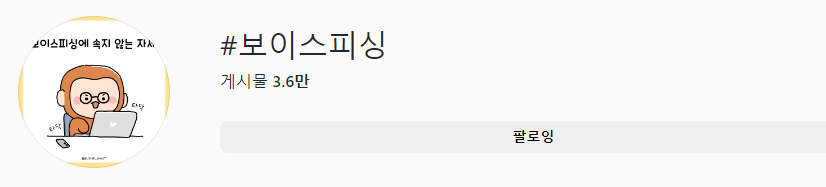

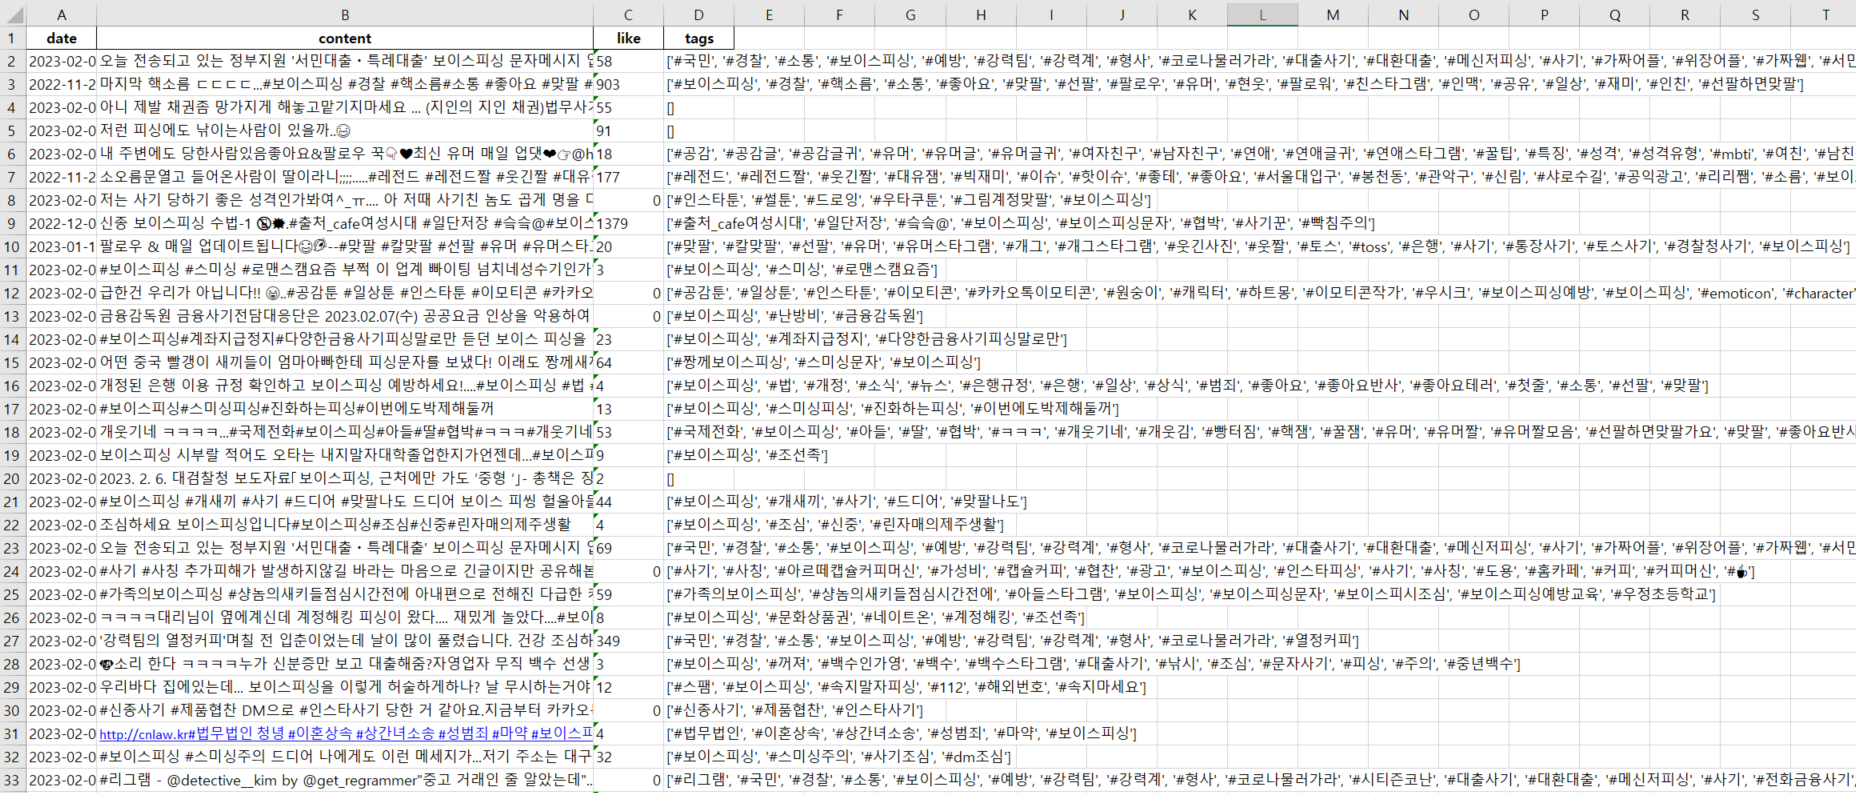

# 1. 라이브러리

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from datetime import datetime

# 2. 함수

In [ ]:
def login(id, password):
    url = "https://www.instagram.com/accounts/login/"
    driver.get(url)
    time.sleep(5)
    
    input = driver.find_elements_by_tag_name("input")
    input[0].send_keys(id) # 아이디 입력
    input[1].send_keys(password) # 비밀번호 입력
    input[1].send_keys(Keys.RETURN) # 엔터(로그인)
    time.sleep(5)

    # 로그인 정보 저장 여부 팝업창 제거 ("나중에 하기 버튼 클릭")
    btn = driver.find_element_by_class_name('_acan._acao._acas')
    btn.click()
    time.sleep(5)

    # 알림 설정 팝업창 제거 ("나중에 하기 버튼 클릭")
    btn2 = driver.find_element_by_class_name('_a9--._a9_1')
    btn2.click()

* 로그인 함수로, 입력받은 id, password를 통해 인스타 홈페이지에서 로그인을 수행한다.
* btn : 로그인 후, 정보를 저장하는지 여부를 물어보는 팝업창을 제거하기 위해 "나중에 하기 버튼"을 클릭하기 위함
* btn2 : 알림 설정 여부를 물어보는 팝업창을 제거하기 위해 "나중에 하기 버튼"을 클릭하기 위함

In [ ]:
def firstClick(driver):
    first = driver.find_elements_by_css_selector("div._aagw")[0]
    first.click()
    time.sleep(3)

In [ ]:
def crawlContent(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    try:
        content = soup.select('div._a9zs')[0].text
    except:
        content = ''
    tags = re.findall(r'#[^\s#,\\]+', content)
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    try:
        like = soup.select('div._aacl._aaco._aacw._aacx._aada._aade')[0].findAll('span')[-1].text
    except:
        like = 0
    try:
        place = soup.select('div._aaqm')[0].text
    except:
        place = ''
    data = [content, date, like, place, tags]
    return data

* content : 게시글의 본문 내용
* tag : 게시글의 해시태그
* date : 게시글의 작성일자
* like = 게시글의 좋아요

In [ ]:
def nextContent(driver):
    next_btn = driver.find_element_by_css_selector("div._aaqg._aaqh")
    next_btn.click()
    time.sleep(3)

* div._aaqg._aaqh : 다음 게시글로 이동하기 위한 버튼

# 2. 로그인

In [ ]:
driver = webdriver.Chrome("./chromedriver.exe")
id = "비공개"
password = "비공개"

login(id,password)

* Chrome Webdriver 실행 후, id와 password로 login 함수 호출

# 3. 키워드 입력 후, 크롤링 시작

In [ ]:
keyword = '보이스피싱' # 검색할 키워드
driver.get('https://www.instagram.com/explore/tags/' + keyword + '/')
time.sleep(5)

firstClick(driver)
time.sleep(5)

* 크롤링하려는 키워드 입력 후, 페이지 로드를 기다리기 위해 5초 대기
* 검색 결과가 나오면 그 중, 첫 번째 게시글을 클릭

In [ ]:
result = []
count = 500
for i in range(target):
    try:
        data = crawlContent(driver)
        result.append(data)
        nextContent(driver)
    except:
        time.sleep(2)
        nextContent(driver)
    time.sleep(10)
#print(result[:2])

* result : 크롤링 수행한 데이터 저장
* count : 크롤링할 게시글 개수

# 4. 결과 저장

In [ ]:
date = datetime.today().strftime('%Y-%m-%d')
result_df = pd.DataFrame(result)
result_df.columns = ['content','date','like','place','tags']
result_df.to_excel('insta_crawling_data.xlsx')